In [1]:
!pip install tensorflow
!pip install scikit-learn

In [2]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [4]:
# Loading the training and test data
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

# Separating features (pixels) and labels
X_train = train_df.drop(labels=["label"], axis=1)
Y_train = train_df["label"]

# Normalizing the pixel values to be between 0 and 1
X_train = X_train / 255.0
test_df = test_df / 255.0

# Reshaping the data to be 3D (height, width, channels)
X_train = X_train.values.reshape(-1, 28, 28, 1)
test_images = test_df.values.reshape(-1, 28, 28, 1)

# One-hot encoding the labels
Y_train = to_categorical(Y_train, num_classes=10)

# Spliting the training data into training and validation sets
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.1, random_state=42)

In [5]:
# 1. Define the Data Augmentation
# The import is now handled correctly in your main import cell (Cell 2)

datagen = ImageDataGenerator(
    rotation_range=10,        # Randomly rotate images by up to 10 degrees
    zoom_range = 0.1,         # Randomly zoom in by up to 10%
    width_shift_range=0.1,    # Randomly shift images horizontally by 10%
    height_shift_range=0.1  # Randomly shift images vertically by 10%
)

# 2. Fit the generator on our training data
datagen.fit(X_train)

In [7]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

D:\Python\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [9]:
# Set up the generator
train_generator = datagen.flow(X_train, Y_train, batch_size=128)

# Set steps_per_epoch (how many batches to run per epoch)
steps_per_epoch = len(X_train) // 128

# Training the model with augmented data
history = model.fit(train_generator,
                    epochs=30,  # Increased epochs as augmentation needs longer training
                    verbose=1,
                    validation_data=(X_val, Y_val),
                    steps_per_epoch=steps_per_epoch)

Epoch 1/30


D:\Python\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


295/295 ━━━━━━━━━━━━━━━━━━━━ 13s 38ms/step - accuracy: 0.7807 - loss: 0.6752 - val_accuracy: 0.9695 - val_loss: 0.0952
Epoch 2/30
  1/295 ━━━━━━━━━━━━━━━━━━━━ 9s 31ms/step - accuracy: 0.9297 - loss: 0.2084

D:\Python\Lib\site-packages\keras\src\trainers\epoch_iterator.py:116: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


295/295 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9297 - loss: 0.2084 - val_accuracy: 0.9683 - val_loss: 0.0966
Epoch 3/30
295/295 ━━━━━━━━━━━━━━━━━━━━ 11s 37ms/step - accuracy: 0.9204 - loss: 0.2563 - val_accuracy: 0.9790 - val_loss: 0.0603
Epoch 4/30
295/295 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9375 - loss: 0.2086 - val_accuracy: 0.9798 - val_loss: 0.0601
Epoch 5/30
295/295 ━━━━━━━━━━━━━━━━━━━━ 11s 37ms/step - accuracy: 0.9418 - loss: 0.1963 - val_accuracy: 0.9838 - val_loss: 0.0515
Epoch 6/30
295/295 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9688 - loss: 0.1205 - val_accuracy: 0.9838 - val_loss: 0.0508
Epoch 7/30
295/295 ━━━━━━━━━━━━━━━━━━━━ 11s 39ms/step - accuracy: 0.9534 - loss: 0.1599 - val_accuracy: 0.9848 - val_loss: 0.0454
Epoch 8/30
295/295 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9453 - loss: 0.1558 - val_accuracy: 0.9845 - val_loss: 0.0448
Epoch 9/30
295/295 ━━━━━━━━━━━━━━━━━━━━ 11s 39ms/step - accuracy: 0.9568 - loss: 0.1443 - val_accuracy: 0.986

In [10]:
# Predicting the values from the test dataset
Y_pred = model.predict(test_images)

# Converting predictions classes to one hot vectors
Y_pred_classes = np.argmax(Y_pred, axis=1)

875/875 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step


In [11]:
# Creating a DataFrame for the submission file
submission = pd.DataFrame({
    "ImageId": list(range(1, len(Y_pred_classes) + 1)),
    "Label": Y_pred_classes
})

submission.to_csv("submission.csv", index=False)

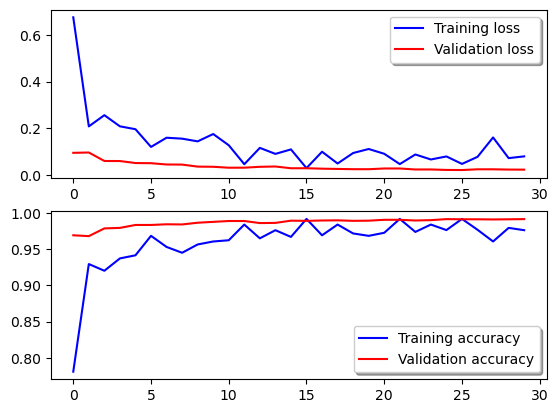

In [12]:
import matplotlib.pyplot as plt

# Plotting the loss and accuracy curves for training and validation
fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="Validation loss")
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)

plt.show()

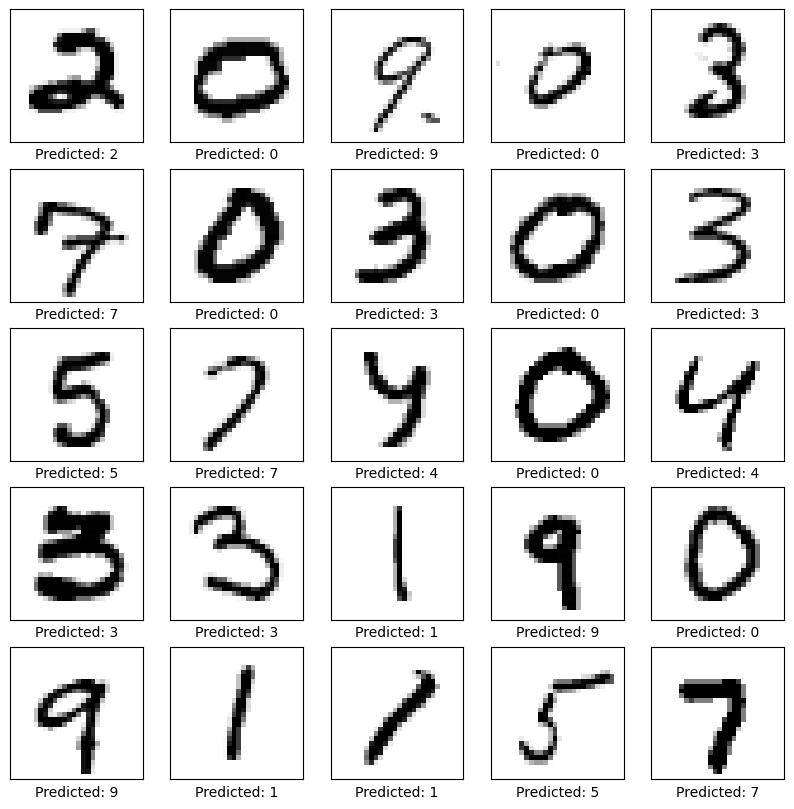

In [13]:
# Displaying some of the test images and their predicted labels
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[i].reshape(28, 28), cmap=plt.cm.binary)
    plt.xlabel(f"Predicted: {Y_pred_classes[i]}")
plt.show()

132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


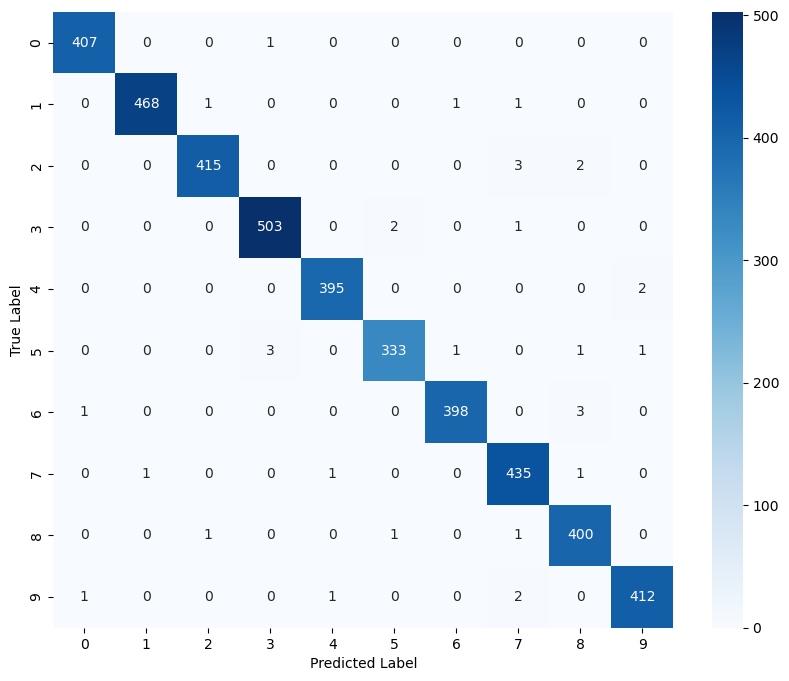

In [14]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Generating the confusion matrix
confusion_mtx = confusion_matrix(np.argmax(Y_val, axis=1), np.argmax(model.predict(X_val), axis=1))

# Plotting the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_mtx, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [16]:
total_train_records = len(train_df)
total_test_records = len(test_df)
training_data_count = len(X_train)
validation_data_count = len(X_val)
split_percent = (validation_data_count / total_train_records) * 100

# Get accuracy from the 'history' object
final_train_acc = history.history['accuracy'][-1]
final_val_acc = history.history['val_accuracy'][-1]

# Print the formatted report
print("==================================================")
print("          CNN Model Results Report          ")
print("==================================================")
print("\n--- 1. Dataset Information ---")
print(f"Dataset Used:      MNIST Handwritten Digits (from train.csv, test.csv)")
print(f"Total Records (Train): {total_train_records}")
print(f"Total Records (Test):  {total_test_records}")

print("\n--- 2. Data Split (from train.csv) ---")
print(f"Training/Validation Split: {100-split_percent:.0f}% / {split_percent:.0f}%")
print(f"Amount of Training Data:   {training_data_count} records")
print(f"Amount of Validation Data: {validation_data_count} records")

print("\n--- 3. Model Performance (Final Epoch) ---")
print(f"Final Training Accuracy:   {final_train_acc * 100:.2f}%")
print(f"Final Validation Accuracy: {final_val_acc * 100:.2f}%")
print("\n==================================================")

          CNN Model Results Report          

--- 1. Dataset Information ---
Dataset Used:      MNIST Handwritten Digits (from train.csv, test.csv)
Total Records (Train): 42000
Total Records (Test):  28000

--- 2. Data Split (from train.csv) ---
Training/Validation Split: 90% / 10%
Amount of Training Data:   37800 records
Amount of Validation Data: 4200 records

--- 3. Model Performance (Final Epoch) ---
Final Training Accuracy:   97.66%
Final Validation Accuracy: 99.19%



In [20]:
# Get the final accuracy scores from the 'history' object
final_train_acc = history.history['accuracy'][-1]
final_val_acc = history.history['val_accuracy'][-1]

# Get the final loss scores from the 'history' object
final_train_loss = history.history['loss'][-1]
final_val_loss = history.history['val_loss'][-1]

# --- Print the Full Detailed Report ---

print("="*50)
print("     DETAILED CNN MODEL IMPLEMENTATION REPORT")
print("="*50)
print("\n")

print("--- 1. DATASET DETAILS ---")
print(f"Dataset Used:         MNIST Handwritten Digits (from train.csv, test.csv)")
print(f"Total Records (Train):  {len(train_df)}")
print(f"Total Records (Test):   {len(test_df)}")
print("\n")

print("--- 2. DATA SPLIT ---")
print(f"Total Training Data:    {len(X_train)} images (90% of train.csv)")
print(f"Total Validation Data:  {len(X_val)} images (10% of train.csv)")
print("\n")

print("--- 3. MODEL & TRAINING PARAMETERS ---")
print(f"Optimizer:              adam")
print(f"Loss Function:          categorical_crossentropy")
print(f"Training Epochs:        30")
print(f"Batch Size:             128")
print("\n")

print("--- 4. MODEL ACCURACY & LOSS ---")
print(f"Final Training Accuracy:   {final_train_acc:.4f} (or {final_train_acc*100:.2f}%)")
print(f"Final Validation Accuracy: {final_val_acc:.4f} (or {final_val_acc*100:.2f}%)")
print(f"Final Training Loss:       {final_train_loss:.4f}")
print(f"Final Validation Loss:     {final_val_loss:.4f}")
print("\n")


print("="*50)
print("     END OF REPORT")
print("="*50)

     DETAILED CNN MODEL IMPLEMENTATION REPORT


--- 1. DATASET DETAILS ---
Dataset Used:         MNIST Handwritten Digits (from train.csv, test.csv)
Total Records (Train):  42000
Total Records (Test):   28000


--- 2. DATA SPLIT ---
Total Training Data:    37800 images (90% of train.csv)
Total Validation Data:  4200 images (10% of train.csv)


--- 3. MODEL & TRAINING PARAMETERS ---
Optimizer:              adam
Loss Function:          categorical_crossentropy
Training Epochs:        30
Batch Size:             128


--- 4. MODEL ACCURACY & LOSS ---
Final Training Accuracy:   0.9766 (or 97.66%)
Final Validation Accuracy: 0.9919 (or 99.19%)
Final Training Loss:       0.0801
Final Validation Loss:     0.0232


     END OF REPORT
